<a href="https://colab.research.google.com/github/ArthurDP-03/Analise_enem_2023/blob/main/An%C3%A1lise_Explorat%C3%B3ria_ENEM_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**An√°lise de Dados Enem 2023**

**Autor**: Arthur de Oliveira <a href="https://www.linkedin.com/in/arthurdatadriven" target="_blank">Linkedln</a>

**Data de produ√ß√£o**: 30/08/2024

---

##**Objetivos**:
Entender como os alunos que concluiram o Enem de 2023 performaram de acordo com a cor de pele e sexo. E se de acordo com essas vari√°veis temos como prever sua nota.

Para isso iremos responder algumas perguntas:


1- Quantos alunos fizeram o enem?

2- Qual a porcentagem de alunos por cor?

3- Qual a porcentagem de alunos por escolaridade?

4- Qual o DESVIO PADR√ÉO e M√âDIA da nota_geral por cor?

5- Qual o DESVIO PADR√ÉO e M√âDIA da nota_geral por sexo?

6- Qual o DESVIO PADR√ÉO e M√âDIA de cada mat√©ria por cor?

7- Qual o DESVIO PADR√ÉO e M√âDIA de cada mat√©ria por sexo?






8- Atrav√©s dos dados criar um modelo de previs√£o de nota de cada mat√©ria por cor e sexo. Para saber se d√° pra prever quanto um aluno iria tirar de nota dependendo da sua cor e ra√ßa.

##**Dados a serem usados:**
**Material**: Microdados do [Enem 2023](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) (Arquivos atualizados em 24/07/2024 ap√≥s ajustes no dicion√°rio de dados e na base de itens)

O dicion√°rio estar√° dispon√≠vel detalhadamente no drive.

---

### **Caracter√≠sticas:**
NU_INSCRICAO: numero de inscri√ß√£o

NU_ANO: Ano do enem

TP_SEXO: sexo por c√≥digo

TP_COR_RACA: ra√ßa por c√≥digo

---



### **Status de presen√ßa:**

TP_PRESENCA_CN: Ci√™ncias da Natureza

TP_PRESENCA_CH: Ci√™ncias Humanas

TP_PRESENCA_LC: Linguagem e c√≥digos

TP_PRESENCA_MT: Matem√°tica

TP_STATUS_REDACAO: Reda√ß√£o

---


### **Notas:**

NU_NOTA_CN: Ci√™ncias da Natureza

NU_NOTA_CH: Ci√™ncias Humanas

NU_NOTA_LC: Linguagem e c√≥digos

NU_NOTA_MT: Matem√°tica

NU_NOTA_REDACAO: Reda√ß√£o

##**Biblioteca de Aux√≠lio:**



*   Numpy: biblioteca de computa√ß√£o cient√≠fica
*   Pandas: biblioteca de manipula√ß√£o de dados
*   Seaborn: biblioteca de visualiza√ß√£o de dados
*   Matplotlib: biblioteca mais complexa que da origem ao seaborn
*   Warnings: remove os warning de execu√ß√£o (para n√£o poluir os estudos)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


---

In [ ]:
!pip install -U scikit-learn

##**Download e Leitura dos Dados:**





- Baixar arquivo csv do enem

In [ ]:
!pip install gdown

import gdown

#  ID do arquivo
dados_id = "1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5"
dicionario_id = '14oBF_7c87698Sa56COolpfEcMHkH8hDz'

# Nome do arquivo local que ser√° salvo
output = "MICRODADOS_ENEM_2023.csv"
output2 = "Dicion√°rio_Microdados_Enem_2023.xlsx"
# Fazer o download
gdown.download(f"https://drive.google.com/uc?id={dados_id}", output, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={dicionario_id}", output2, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5
From (redirected): https://drive.google.com/uc?id=1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5&confirm=t&uuid=17a50b36-1c3e-4ea3-95ab-653e5f078349
To: /content/MICRODADOS_ENEM_2023.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.78G/1.78G [00:39<00:00, 44.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=14oBF_7c87698Sa56COolpfEcMHkH8hDz
To: /content/Dicion√°rio_Microdados_Enem_2023.xlsx
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.6k/20.6k [00:00<00:00, 22.2MB/s]


'Dicion√°rio_Microdados_Enem_2023.xlsx'

- Ler arquivo csv do enem

In [ ]:
dados_enem = pd.read_csv("MICRODADOS_ENEM_2023.csv", sep=';', encoding='latin-1')
dados_enem

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0        210059085136    2023               14       M                2   
1        210059527735    2023               12       M                2   
2        210061103945    2023                6       F                1   
3        210060214087    2023                2       F                1   
4        210059980948    2023                3       F                1   
...               ...     ...              ...     ...              ...   
3933950  210061959676    2023               12       M                1   
3933951  210061950911    2023                1       F                1   
3933952  210061965966    2023                3       F                1   
3933953  210061932304    2023                2       M                1   
3933954  210058924455    2023                3       F                1   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                  1                 1                1               17   
1                  1                 0                1               16   
2                  1                 1                1                0   
3                  3                 1                2                0   
4                  3                 1                2                0   
...              ...               ...              ...              ...   
3933950            1                 1                1                6   
3933951            1                 2                3                0   
3933952            3                 1                2                0   
3933953            1                 1                2                0   
3933954            3                 1                2                0   

         TP_ESCOLA  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  \
0                1  ...     C     C     B    B     A    B     B     A     A   
1                1  ...     B     A     B    B     A    A     C     A     D   
2                1  ...     B     A     A    B     A    A     A     A     A   
3                2  ...     A     A     A    B     A    A     D     A     A   
4                2  ...     A     A     A    B     A    A     B     A     A   
...            ...  ...   ...   ...   ...  ...   ...  ...   ...   ...   ...   
3933950          1  ...     B     A     A    C     A    B     E     A     A   
3933951          1  ...     B     A     B    C     B    B     B     B     C   
3933952          2  ...     A     A     A    B     A    A     B     A     A   
3933953          3  ...     B     B     B    C     A    A     D     A     C   
3933954          2  ...     A     A     A    B     B    A     D     A     B   

         Q025  
0           B  
1           B  
2           B  
3           B  
4           A  
...       ...  
3933950     B  
3933951     B  
3933952     B  
3933953     B  
3933954     B  

[3933955 rows x 76 columns]

In [ ]:
dados_enem.shape


(3933955, 76)

In [ ]:
dados_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

## **Limpeza dos dados**:

In [ ]:
dados_enem_novo = dados_enem[['TP_SEXO', 'TP_COR_RACA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO']]
dados_enem_novo


TP_SEXO  TP_COR_RACA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
0             M            1               0               0               0   
1             M            1               0               0               0   
2             F            1               1               1               1   
3             F            3               1               1               1   
4             F            3               1               1               1   
...         ...          ...             ...             ...             ...   
3933950       M            1               1               1               1   
3933951       F            1               1               1               1   
3933952       F            3               0               0               0   
3933953       M            1               1               1               1   
3933954       F            3               0               0               0   

         TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                     0         NaN         NaN         NaN         NaN   
1                     0         NaN         NaN         NaN         NaN   
2                     1       502.0       498.9       475.6       363.2   
3                     1       459.0       508.5       507.2       466.7   
4                     1       402.5       379.2       446.9       338.3   
...                 ...         ...         ...         ...         ...   
3933950               1       566.2       605.6       613.7       547.3   
3933951               1       377.2       535.6       610.6       644.4   
3933952               0         NaN         NaN         NaN         NaN   
3933953               1       515.7       539.0       536.0       569.0   
3933954               0         NaN         NaN         NaN         NaN   

         TP_STATUS_REDACAO  NU_NOTA_REDACAO  
0                      NaN              NaN  
1                      NaN              NaN  
2                      1.0            700.0  
3                      1.0            880.0  
4                      1.0            560.0  
...                    ...              ...  
3933950                1.0            540.0  
3933951                1.0            640.0  
3933952                NaN              NaN  
3933953                1.0            600.0  
3933954                NaN              NaN  

[3933955 rows x 12 columns]

- Removendo as pessoas que n√£o realizaram todas as provas e anularam a reda√ß√£o
- Resetando o √≠ndice ap√≥s a remo√ß√£o
- Exibindo o resultado

In [ ]:
dados_enem_novo = dados_enem_novo[dados_enem_novo[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']].eq(1).all(axis=1)]
dados_enem_novo = dados_enem_novo.dropna(subset=['TP_STATUS_REDACAO'])

dados_enem_novo = dados_enem_novo.reset_index(drop=True)

dados_enem_novo


TP_SEXO  TP_COR_RACA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
0             F            1               1               1               1   
1             F            3               1               1               1   
2             F            3               1               1               1   
3             M            1               1               1               1   
4             M            3               1               1               1   
...         ...          ...             ...             ...             ...   
2678259       F            1               1               1               1   
2678260       M            1               1               1               1   
2678261       M            1               1               1               1   
2678262       F            1               1               1               1   
2678263       M            1               1               1               1   

         TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                     1       502.0       498.9       475.6       363.2   
1                     1       459.0       508.5       507.2       466.7   
2                     1       402.5       379.2       446.9       338.3   
3                     1       564.7       630.3       610.4       680.2   
4                     1       644.9       620.2       626.9       736.3   
...                 ...         ...         ...         ...         ...   
2678259               1       568.6       605.2       598.2       496.8   
2678260               1       476.2       542.9       545.2       530.5   
2678261               1       566.2       605.6       613.7       547.3   
2678262               1       377.2       535.6       610.6       644.4   
2678263               1       515.7       539.0       536.0       569.0   

         TP_STATUS_REDACAO  NU_NOTA_REDACAO  
0                      1.0            700.0  
1                      1.0            880.0  
2                      1.0            560.0  
3                      1.0            600.0  
4                      1.0            860.0  
...                    ...              ...  
2678259                1.0            500.0  
2678260                1.0            600.0  
2678261                1.0            540.0  
2678262                1.0            640.0  
2678263                1.0            600.0  

[2678264 rows x 12 columns]

- Tirando os zeros e resetando os √≠ndices

In [ ]:
dados_enem_novo = dados_enem_novo.dropna().reset_index(drop=True)
dados_enem_novo

TP_SEXO  TP_COR_RACA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
0             F            1               1               1               1   
1             F            3               1               1               1   
2             F            3               1               1               1   
3             M            1               1               1               1   
4             M            3               1               1               1   
...         ...          ...             ...             ...             ...   
2678259       F            1               1               1               1   
2678260       M            1               1               1               1   
2678261       M            1               1               1               1   
2678262       F            1               1               1               1   
2678263       M            1               1               1               1   

         TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                     1       502.0       498.9       475.6       363.2   
1                     1       459.0       508.5       507.2       466.7   
2                     1       402.5       379.2       446.9       338.3   
3                     1       564.7       630.3       610.4       680.2   
4                     1       644.9       620.2       626.9       736.3   
...                 ...         ...         ...         ...         ...   
2678259               1       568.6       605.2       598.2       496.8   
2678260               1       476.2       542.9       545.2       530.5   
2678261               1       566.2       605.6       613.7       547.3   
2678262               1       377.2       535.6       610.6       644.4   
2678263               1       515.7       539.0       536.0       569.0   

         TP_STATUS_REDACAO  NU_NOTA_REDACAO  
0                      1.0            700.0  
1                      1.0            880.0  
2                      1.0            560.0  
3                      1.0            600.0  
4                      1.0            860.0  
...                    ...              ...  
2678259                1.0            500.0  
2678260                1.0            600.0  
2678261                1.0            540.0  
2678262                1.0            640.0  
2678263                1.0            600.0  

[2678264 rows x 12 columns]

## **Respostas**

####1- Quantos alunos fizeram o enem? ->



In [ ]:
#1

dados_enem_novo.shape

(2678264, 12)

####2- Porcentagens de alunos por cor ->



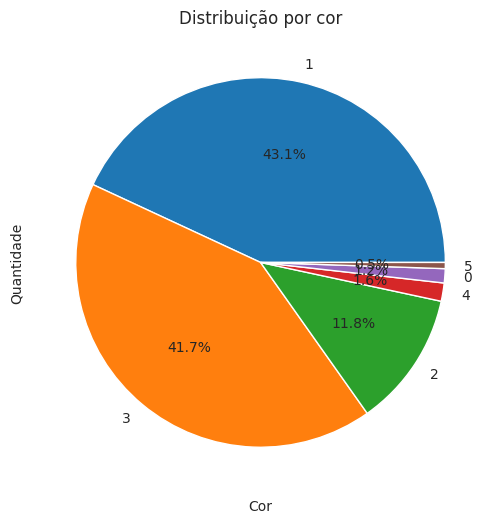

In [ ]:
#2
dados_cor = dados_enem_novo.query['TP_COR_RACA != 0']
plt.figure(figsize=(10, 6))
with sns.axes_style('whitegrid'):
  plt.pie(dados_cor.value_counts(), labels=dados_cor.value_counts().index, autopct='%1.1f%%')
  plt.title('Distribui√ß√£o por cor')
  plt.ylabel('Quantidade')
  plt.xlabel('Cor')


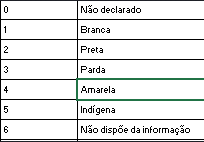

####3- Porcentagem de alunos por sexo ->



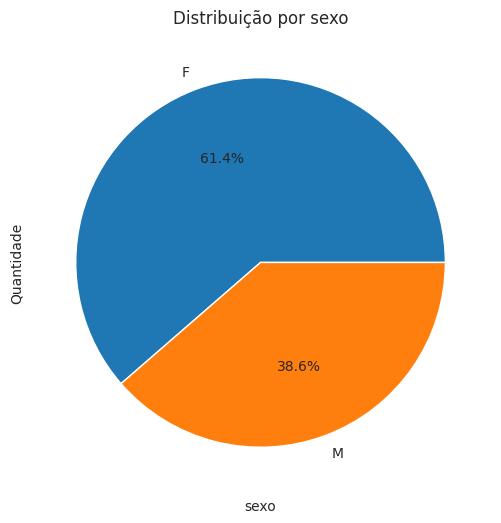

In [ ]:
#3
dados_sexo = dados_enem_novo['TP_SEXO']
plt.figure(figsize=(10, 6))
with sns.axes_style('whitegrid'):
  plt.pie(dados_sexo.value_counts(), labels=dados_sexo.value_counts().index, autopct='%1.1f%%')
  plt.title('Distribui√ß√£o por sexo')
  plt.ylabel('Quantidade')
  plt.xlabel('sexo')


####4- DESVIO PADR√ÉO e M√âDIA da nota_geral por cor ->


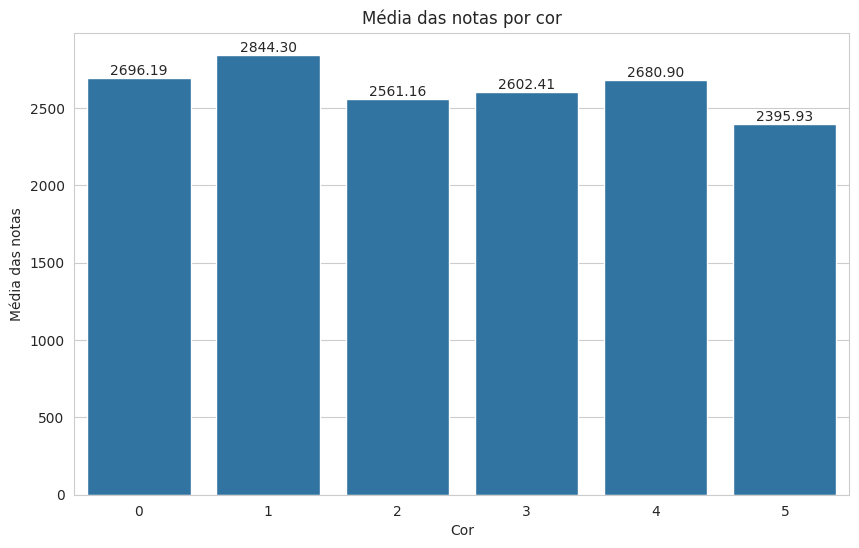

In [ ]:
#4.1
notas = dados_enem_novo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
soma_notas= notas.sum(axis=1)

dados_enem_novo['soma_notas'] = soma_notas
dados_cor_mean= dados_enem_novo[['TP_COR_RACA', 'soma_notas']]
#media por cor
dados_cor_mean = dados_cor_mean.groupby('TP_COR_RACA').mean()
dados_cor_mean = dados_cor_mean.reset_index()

dados_cor_mean
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='TP_COR_RACA', y='soma_notas', data=dados_cor_mean)
  plt.title('M√©dia das notas por cor')
  plt.xlabel('Cor')
  plt.ylabel('M√©dia das notas')
  for i, v in enumerate(dados_cor_mean['soma_notas']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')



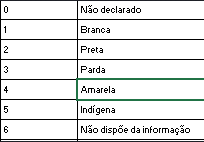

In [ ]:
 #4.2 use o desvio padr√£o para um grafico boxplot para cada cor
dados_cor_std = dados_enem_novo.groupby("TP_COR_RACA")["soma_notas"].std()
dados_cor_std = dados_cor_std.reset_index()
dados_cor_std

TP_COR_RACA  soma_notas
0            0  512.129858
1            1  468.583719
2            2  430.863619
3            3  454.676383
4            4  507.048324
5            5  427.865374

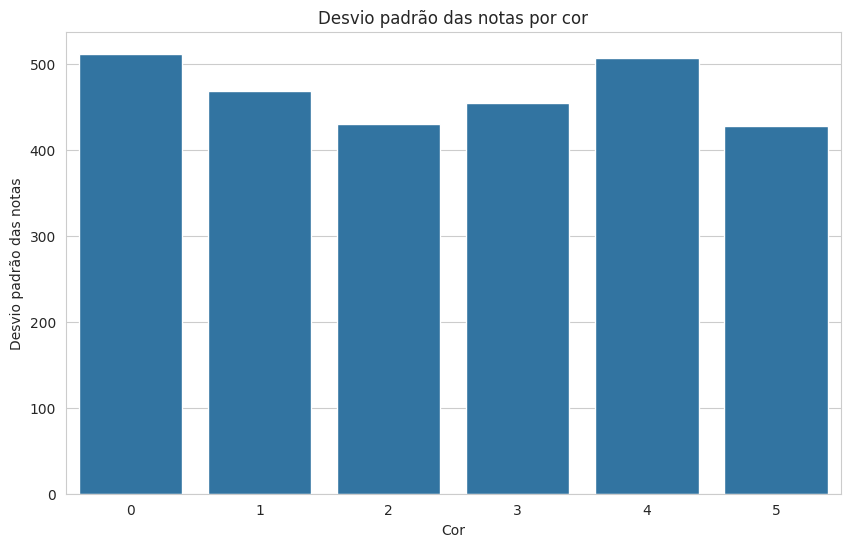

In [ ]:
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(
    x="TP_COR_RACA",
    y="soma_notas",
    data=dados_cor_std
)
  plt.title('Desvio padr√£o das notas por cor')
  plt.xlabel('Cor')
  plt.ylabel('Desvio padr√£o das notas')



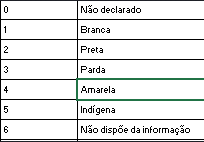

####5- DESVIO PADR√ÉO e M√âDIA da nota_geral por sexo ->


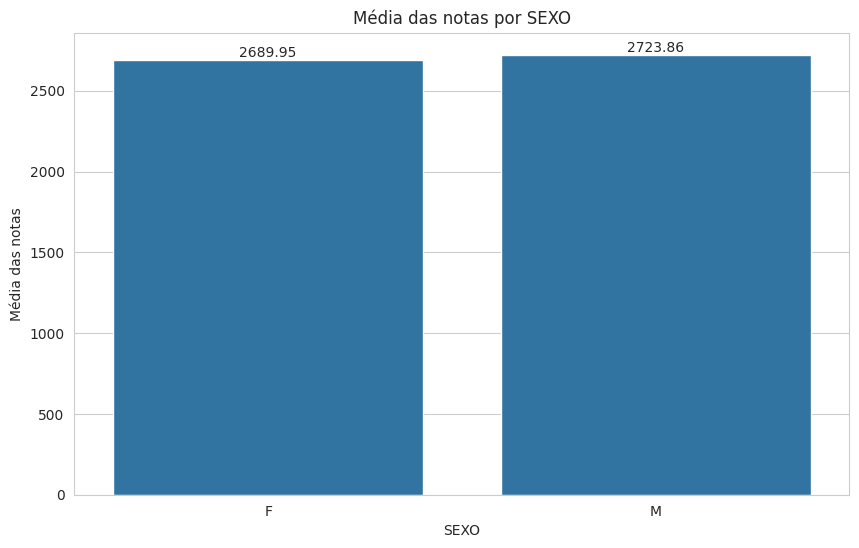

In [ ]:
#5.1
notas = dados_enem_novo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
soma_notas= notas.sum(axis=1)

dados_enem_novo['soma_notas'] = soma_notas
dados_sexo_mean= dados_enem_novo[['TP_SEXO', 'soma_notas']]
#media por cor
dados_sexo_mean = dados_sexo_mean.groupby('TP_SEXO').mean()
dados_sexo_mean = dados_sexo_mean.reset_index()

dados_sexo_mean
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='TP_SEXO', y='soma_notas', data=dados_sexo_mean)
  plt.title('M√©dia das notas por SEXO')
  plt.xlabel('SEXO')
  plt.ylabel('M√©dia das notas')
  for i, v in enumerate(dados_sexo_mean['soma_notas']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')


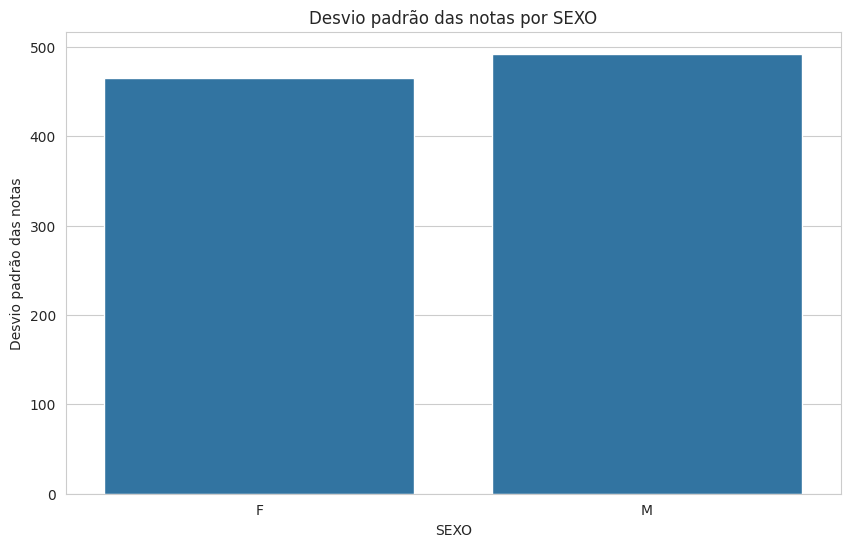

In [ ]:
#5.2
dados_cor_std = dados_enem_novo.groupby("TP_SEXO")["soma_notas"].std()
dados_cor_std = dados_cor_std.reset_index()
dados_cor_std
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(
    x="TP_SEXO",
    y="soma_notas",
    data=dados_cor_std
)
  plt.title('Desvio padr√£o das notas por SEXO')
  plt.xlabel('SEXO')
  plt.ylabel('Desvio padr√£o das notas')


- Aprofundando os dados de sexo

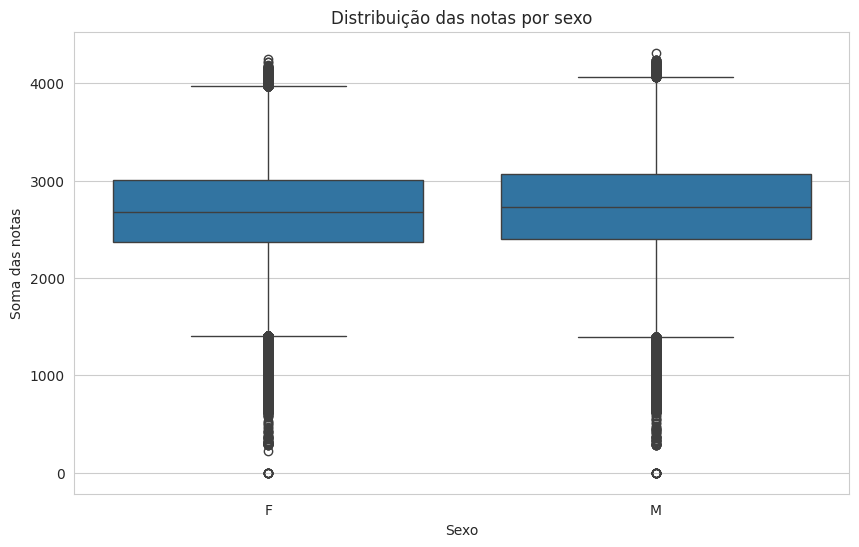

In [ ]:
# Fa√ßa um gr√°fico boxplot com dados do sexo masculino e feminino
dados_enem_sexo = dados_enem_novo[['TP_SEXO', 'soma_notas']]
dados_enem_sexo_masculino = dados_enem_sexo[dados_enem_sexo['TP_SEXO'] == 0]
dados_enem_sexo_feminino = dados_enem_sexo[dados_enem_sexo['TP_SEXO'] == 1]

with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='TP_SEXO', y='soma_notas', data=dados_enem_sexo)
  plt.title('Distribui√ß√£o das notas por sexo')
  plt.xlabel('Sexo')
  plt.ylabel('Soma das notas')


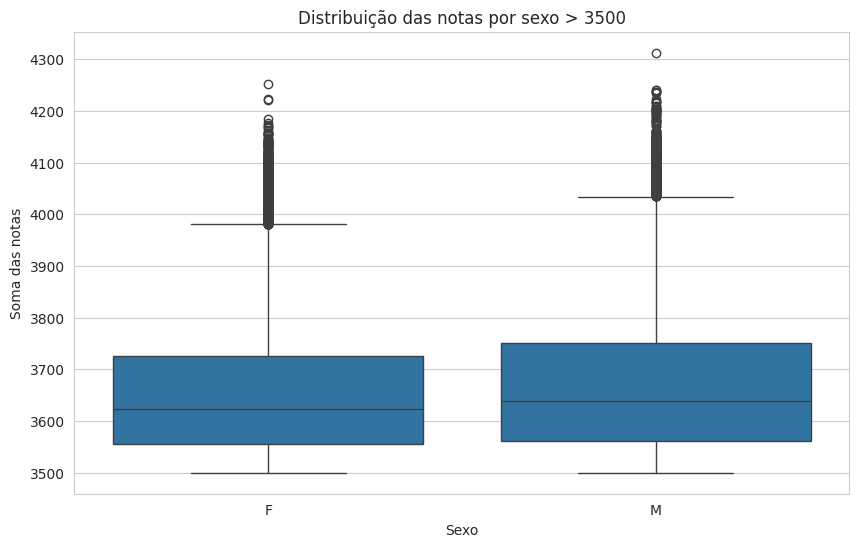

In [ ]:
#pegue apenas alunos que tiveram a media acima de 3500 soma_notas
dados_sexo_3500 = dados_enem_novo[dados_enem_novo['soma_notas'] >= 3500]
dados_sexo_3500
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='TP_SEXO', y='soma_notas', data=dados_sexo_3500)
  plt.title('Distribui√ß√£o das notas por sexo > 3500')
  plt.xlabel('Sexo')
  plt.ylabel('Soma das notas')


In [ ]:
dados_sexo_3500_masculino = dados_enem_novo[(dados_enem_novo['TP_SEXO'] == 'M') & (dados_enem_novo['soma_notas'] >= 3500)]
dados_sexo_3500_feminino = dados_enem_novo[(dados_enem_novo['TP_SEXO'] == 'F') & (dados_enem_novo['soma_notas'] >= 3500)]
dados_sexo_3500_masculino

TP_SEXO  TP_COR_RACA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
60            M            2               1               1               1   
63            M            3               1               1               1   
70            M            3               1               1               1   
78            M            1               1               1               1   
143           M            1               1               1               1   
...         ...          ...             ...             ...             ...   
2678100       M            2               1               1               1   
2678125       M            1               1               1               1   
2678177       M            1               1               1               1   
2678192       M            1               1               1               1   
2678243       M            1               1               1               1   

         TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
60                    1       643.2       601.9       629.3       756.1   
63                    1       680.2       670.1       684.4       706.5   
70                    1       645.0       652.4       612.8       742.1   
78                    1       645.8       681.2       575.1       786.7   
143                   1       678.6       666.1       647.1       831.8   
...                 ...         ...         ...         ...         ...   
2678100               1       651.7       658.8       608.1       689.7   
2678125               1       614.6       619.9       622.1       851.2   
2678177               1       645.3       702.0       675.1       822.4   
2678192               1       620.1       625.3       605.7       733.9   
2678243               1       700.3       661.1       632.7       810.3   

         TP_STATUS_REDACAO  NU_NOTA_REDACAO  soma_notas  
60                     1.0            960.0      3590.5  
63                     1.0            980.0      3721.2  
70                     1.0            940.0      3592.3  
78                     1.0            900.0      3588.8  
143                    1.0            800.0      3623.6  
...                    ...              ...         ...  
2678100                1.0            900.0      3508.3  
2678125                1.0            840.0      3547.8  
2678177                1.0            660.0      3504.8  
2678192                1.0            920.0      3505.0  
2678243                1.0            820.0      3624.4  

[57774 rows x 13 columns]

In [ ]:
dados_sexo_3500_feminino

TP_SEXO  TP_COR_RACA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  \
13            F            1               1               1               1   
21            F            3               1               1               1   
23            F            1               1               1               1   
86            F            3               1               1               1   
163           F            1               1               1               1   
...         ...          ...             ...             ...             ...   
2677421       F            1               1               1               1   
2678110       F            3               1               1               1   
2678166       F            1               1               1               1   
2678176       F            1               1               1               1   
2678225       F            3               1               1               1   

         TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
13                    1       707.0       667.6       628.1       816.8   
21                    1       592.9       624.0       676.4       731.8   
23                    1       632.0       688.4       635.8       709.6   
86                    1       714.4       742.4       711.7       760.4   
163                   1       660.3       658.6       631.4       766.1   
...                 ...         ...         ...         ...         ...   
2677421               1       636.2       661.5       629.2       714.2   
2678110               1       552.4       656.1       672.8       702.7   
2678166               1       656.1       679.9       667.7       735.7   
2678176               1       654.0       740.8       677.1       749.3   
2678225               1       642.3       643.3       608.9       712.2   

         TP_STATUS_REDACAO  NU_NOTA_REDACAO  soma_notas  
13                     1.0            820.0      3639.5  
21                     1.0            880.0      3505.1  
23                     1.0            940.0      3605.8  
86                     1.0            960.0      3888.9  
163                    1.0            940.0      3656.4  
...                    ...              ...         ...  
2677421                1.0            860.0      3501.1  
2678110                1.0            920.0      3504.0  
2678166                1.0            820.0      3559.4  
2678176                1.0            960.0      3781.2  
2678225                1.0            920.0      3526.7  

[72384 rows x 13 columns]

In [ ]:
dados_sexo_3500_masculino.shape[0]/(dados_sexo_3500_masculino.shape[0] + dados_sexo_3500_feminino.shape[0])

0.4438759046697091


####6- DESVIO PADR√ÉO e M√âDIA de cada mat√©ria por cor ->


<ipython-input-23-b074d7e8e793>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapa_cor_raca)
<ipython-input-23-b074d7e8e793>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=colunas_renomeadas, inplace=True)


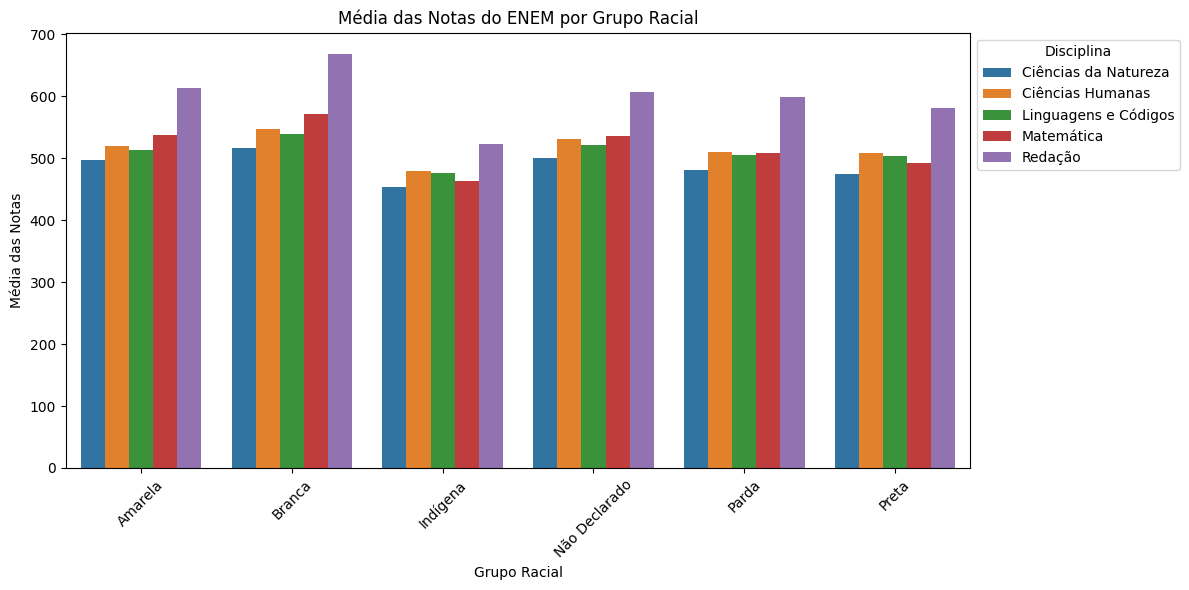

In [ ]:
#6.1
df = dados_enem_novo[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
mapa_cor_raca = {0: 'N√£o Declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Ind√≠gena', 6: 'N√£o Informado'}
colunas_renomeadas = {
    'NU_NOTA_CN': 'Ci√™ncias da Natureza',
    'NU_NOTA_CH': 'Ci√™ncias Humanas',
    'NU_NOTA_LC': 'Linguagens e C√≥digos',
    'NU_NOTA_MT': 'Matem√°tica',
    'NU_NOTA_REDACAO': 'Reda√ß√£o'
}

# Transforma√ß√µes
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapa_cor_raca)
df.rename(columns=colunas_renomeadas, inplace=True)
df_medias = df.groupby('TP_COR_RACA')[list(colunas_renomeadas.values())].mean().reset_index()
df_melted = df_medias.melt(id_vars='TP_COR_RACA', var_name='Disciplina', value_name='M√©dia da Nota')

# Plotagem
plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted, x='TP_COR_RACA', y='M√©dia da Nota', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('M√©dia das Notas')
plt.title('M√©dia das Notas do ENEM por Grupo Racial')
plt.xticks(rotation=45)
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()




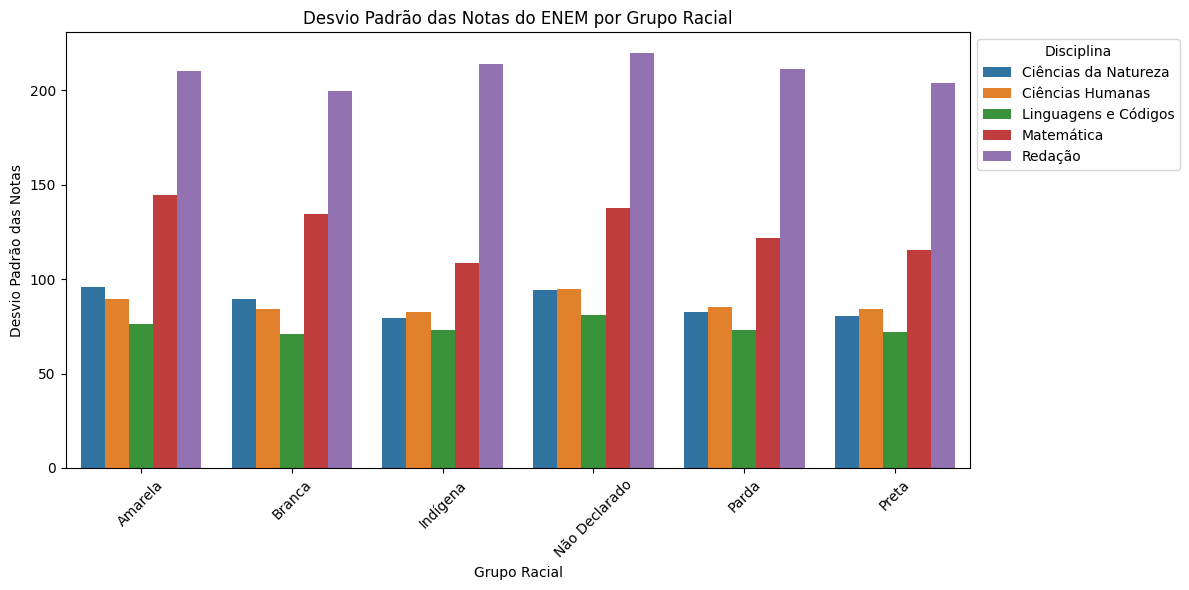

In [ ]:
#6.2 Desvio padr√£o
df_std = df.groupby('TP_COR_RACA')[list(colunas_renomeadas.values())].std().reset_index()
df_melted_std = df_std.melt(id_vars='TP_COR_RACA', var_name='Disciplina', value_name='Desvio Padr√£o')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted_std, x='TP_COR_RACA', y='Desvio Padr√£o', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('Desvio Padr√£o das Notas')
plt.title('Desvio Padr√£o das Notas do ENEM por Grupo Racial')
plt.xticks(rotation=45)
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


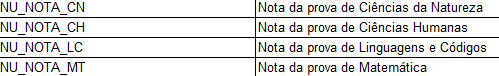


####7- DESVIO PADR√ÉO e M√âDIA de cada mat√©ria por sexo ->

<ipython-input-25-af3e5db28b95>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_por_sexo.rename(columns=colunas_renomeadas, inplace=True)


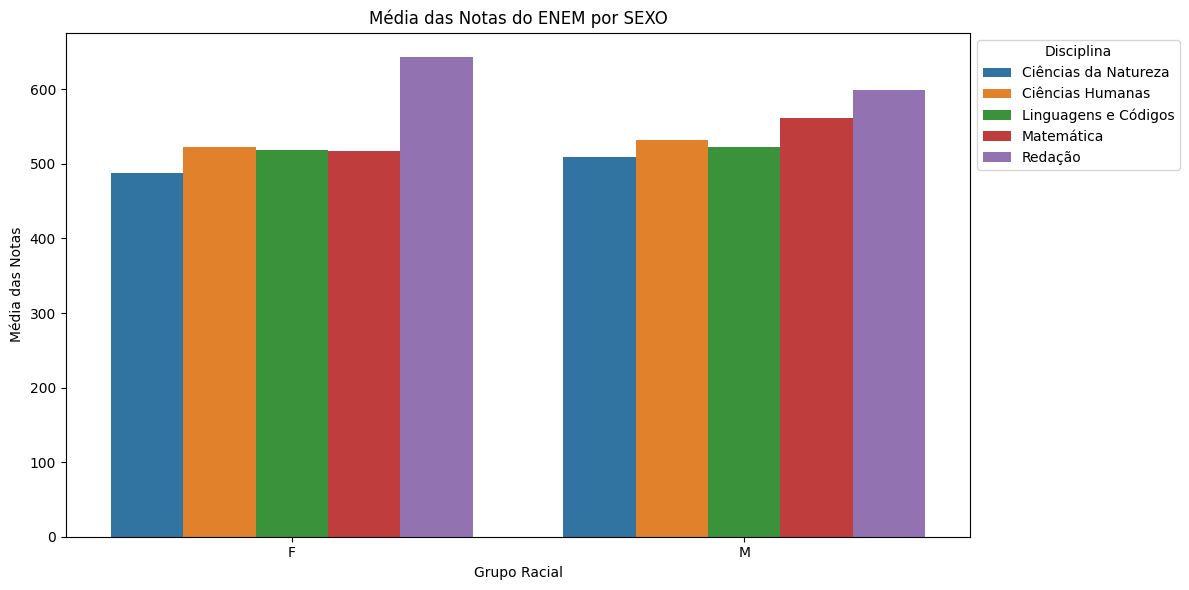

In [ ]:
#7.1 M√âDIA de cada mat√©ria por sexo
df_por_sexo = dados_enem_novo[['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
dados_medias_por_sexo = df_por_sexo.reset_index()

colunas_renomeadas = {
    'NU_NOTA_CN': 'Ci√™ncias da Natureza',
    'NU_NOTA_CH': 'Ci√™ncias Humanas',
    'NU_NOTA_LC': 'Linguagens e C√≥digos',
    'NU_NOTA_MT': 'Matem√°tica',
    'NU_NOTA_REDACAO': 'Reda√ß√£o'
}
df_por_sexo.rename(columns=colunas_renomeadas, inplace=True)
df_medias = df_por_sexo.groupby('TP_SEXO')[list(colunas_renomeadas.values())].mean().reset_index()
df_melted = df_medias.melt(id_vars='TP_SEXO', var_name='Disciplina', value_name='M√©dia da Nota')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted, x='TP_SEXO', y='M√©dia da Nota', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('M√©dia das Notas')
plt.title('M√©dia das Notas do ENEM por SEXO')
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

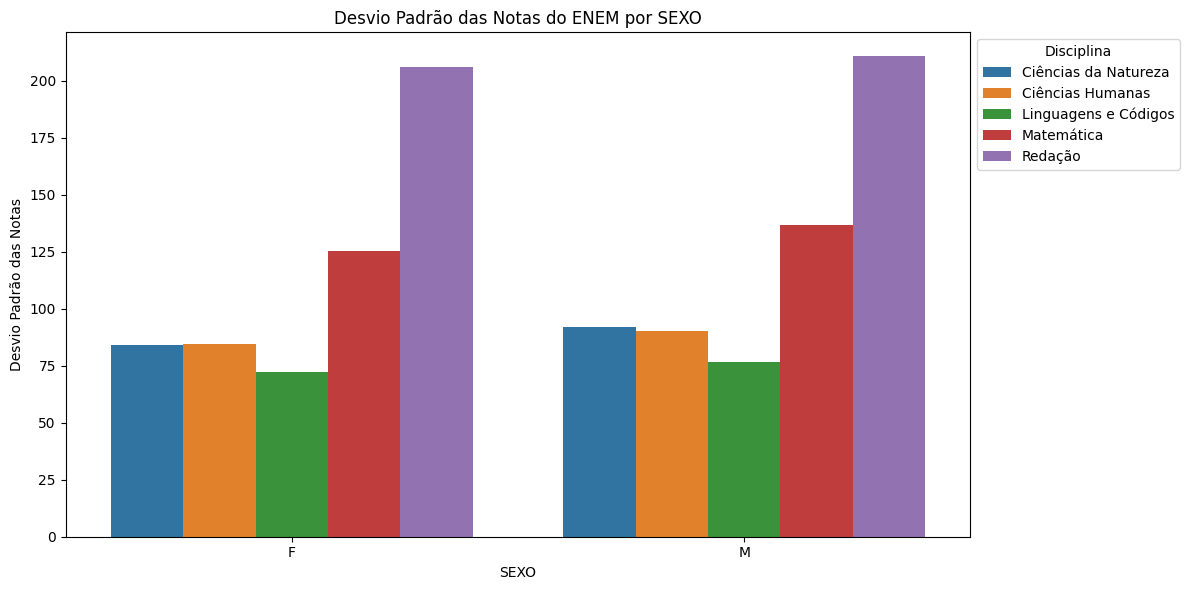

In [ ]:
#7.2
df_std = df_por_sexo.groupby('TP_SEXO')[list(colunas_renomeadas.values())].std().reset_index()
df_melted_std = df_std.melt(id_vars='TP_SEXO', var_name='Disciplina', value_name='Desvio Padr√£o')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted_std, x='TP_SEXO', y='Desvio Padr√£o', hue='Disciplina')
plt.xlabel('SEXO')
plt.ylabel('Desvio Padr√£o das Notas')
plt.title('Desvio Padr√£o das Notas do ENEM por SEXO')
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### **Previs√£o das Notas**

#### **Mudando nome das colunas**

In [ ]:
#Colunas a serem usadas
coluna_pedritora = ['Cor/Ra√ßa', 'Sexo']
colunas_alvo = ['Ci√™ncias da Natureza', 'Ci√™ncias Humanas', 'Linguagens e C√≥digos', 'Matem√°tica', 'Reda√ß√£o']

In [ ]:
print(dados_enem_novo.columns)

Index(['TP_SEXO', 'TP_COR_RACA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'soma_notas'],
      dtype='object')


In [ ]:
dados_enem_novo = dados_enem_novo.rename(columns={
    'TP_COR_RACA': 'Cor/Ra√ßa',
    'TP_SEXO': 'Sexo',
    'NU_NOTA_CN': 'Ci√™ncias da Natureza',
    'NU_NOTA_CH': 'Ci√™ncias Humanas',
    'NU_NOTA_LC': 'Linguagens e C√≥digos',
    'NU_NOTA_MT': 'Matem√°tica',
    'NU_NOTA_REDACAO': 'Reda√ß√£o'
})

In [ ]:
dados_enem_pr = dados_enem_novo[coluna_pedritora + colunas_alvo]


#### **One Hot Encoding**

In [ ]:

dados_enem_pr['Cor/Ra√ßa n/declarada'] = (dados_enem_pr['Cor/Ra√ßa'] == 0).astype(int)
dados_enem_pr['Cor/Ra√ßa Branca'] = (dados_enem_pr['Cor/Ra√ßa'] == 1).astype(int)
dados_enem_pr['Cor/Ra√ßa Preta'] = (dados_enem_pr['Cor/Ra√ßa'] == 2).astype(int)
dados_enem_pr['Cor/Ra√ßa Parda'] = (dados_enem_pr['Cor/Ra√ßa'] == 3).astype(int)
dados_enem_pr['Cor/Ra√ßa Amarela'] = (dados_enem_pr['Cor/Ra√ßa'] == 4).astype(int)
dados_enem_pr['Cor/Ra√ßa Ind√≠gena'] = (dados_enem_pr['Cor/Ra√ßa'] == 5).astype(int)
dados_enem_pr['Cor/Ra√ßa N√£o Informado'] = (dados_enem_pr['Cor/Ra√ßa'] == 6).astype(int)

dados_enem_pr['Masculino'] = (dados_enem_pr['Sexo'] == 'M').astype(int)
dados_enem_pr['Feminino'] = (dados_enem_pr['Sexo'] == 'F').astype(int)

dados_enem_pr_final = dados_enem_pr.drop(columns=['Cor/Ra√ßa', 'Sexo'])
dados_enem_pr_final

<ipython-input-31-4d1f300602fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_enem_pr['Cor/Ra√ßa n/declarada'] = (dados_enem_pr['Cor/Ra√ßa'] == 0).astype(int)
<ipython-input-31-4d1f300602fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_enem_pr['Cor/Ra√ßa Branca'] = (dados_enem_pr['Cor/Ra√ßa'] == 1).astype(int)
<ipython-input-31-4d1f300602fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Ci√™ncias da Natureza  Ci√™ncias Humanas  Linguagens e C√≥digos  \
0                       502.0             498.9                 475.6   
1                       459.0             508.5                 507.2   
2                       402.5             379.2                 446.9   
3                       564.7             630.3                 610.4   
4                       644.9             620.2                 626.9   
...                       ...               ...                   ...   
2678259                 568.6             605.2                 598.2   
2678260                 476.2             542.9                 545.2   
2678261                 566.2             605.6                 613.7   
2678262                 377.2             535.6                 610.6   
2678263                 515.7             539.0                 536.0   

         Matem√°tica  Reda√ß√£o  Cor/Ra√ßa n/declarada  Cor/Ra√ßa Branca  \
0             363.2    700.0                     0                1   
1             466.7    880.0                     0                0   
2             338.3    560.0                     0                0   
3             680.2    600.0                     0                1   
4             736.3    860.0                     0                0   
...             ...      ...                   ...              ...   
2678259       496.8    500.0                     0                1   
2678260       530.5    600.0                     0                1   
2678261       547.3    540.0                     0                1   
2678262       644.4    640.0                     0                1   
2678263       569.0    600.0                     0                1   

         Cor/Ra√ßa Preta  Cor/Ra√ßa Parda  Cor/Ra√ßa Amarela  Cor/Ra√ßa Ind√≠gena  \
0                     0               0                 0                  0   
1                     0               1                 0                  0   
2                     0               1                 0                  0   
3                     0               0                 0                  0   
4                     0               1                 0                  0   
...                 ...             ...               ...                ...   
2678259               0               0                 0                  0   
2678260               0               0                 0                  0   
2678261               0               0                 0                  0   
2678262               0               0                 0                  0   
2678263               0               0                 0                  0   

         Cor/Ra√ßa N√£o Informado  Masculino  Feminino  
0                             0          0         1  
1                             0          0         1  
2                             0          0         1  
3                             0          1         0  
4                             0          1         0  
...                         ...        ...       ...  
2678259                       0          0         1  
2678260                       0          1         0  
2678261                       0          1         0  
2678262                       0          0         1  
2678263                       0          1         0  

[2678264 rows x 14 columns]

In [ ]:
dados_enem_pr_final.columns

Index(['Ci√™ncias da Natureza', 'Ci√™ncias Humanas', 'Linguagens e C√≥digos',
       'Matem√°tica', 'Reda√ß√£o', 'Cor/Ra√ßa n/declarada', 'Cor/Ra√ßa Branca',
       'Cor/Ra√ßa Preta', 'Cor/Ra√ßa Parda', 'Cor/Ra√ßa Amarela',
       'Cor/Ra√ßa Ind√≠gena', 'Cor/Ra√ßa N√£o Informado', 'Masculino', 'Feminino'],
      dtype='object')

#### **Achando outliers**

- testando se h√° muitos outliers

In [ ]:
data = dados_enem_pr[colunas_alvo]
data_query = data.query('`Reda√ß√£o` < 200 & `Matem√°tica` < 200 & `Linguagens e C√≥digos` < 200 & `Ci√™ncias Humanas` < 200 & `Ci√™ncias da Natureza` < 200')
data_query.shape



(20, 5)

- Analizando outliers


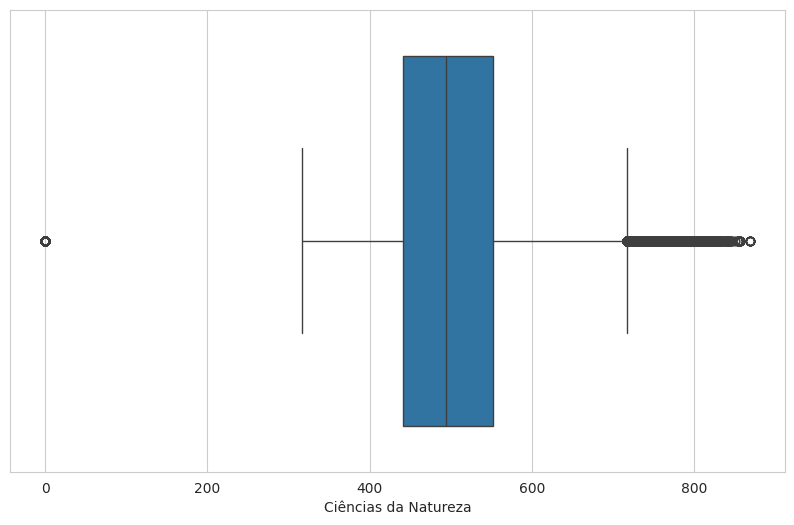

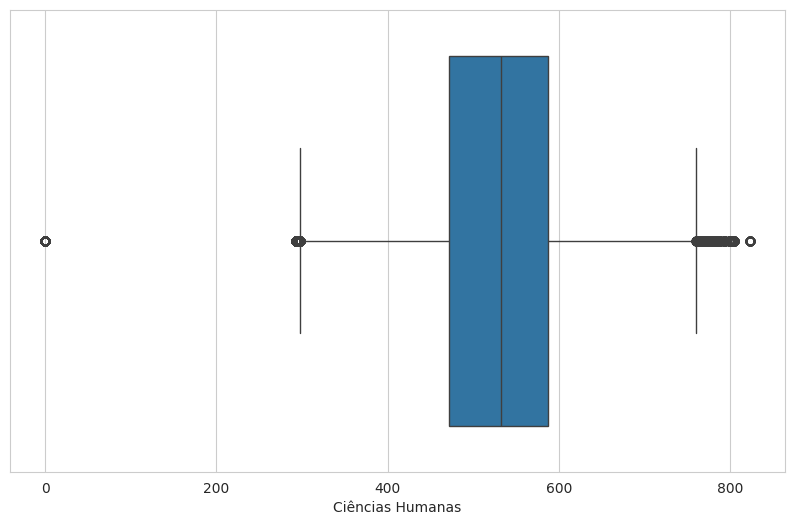

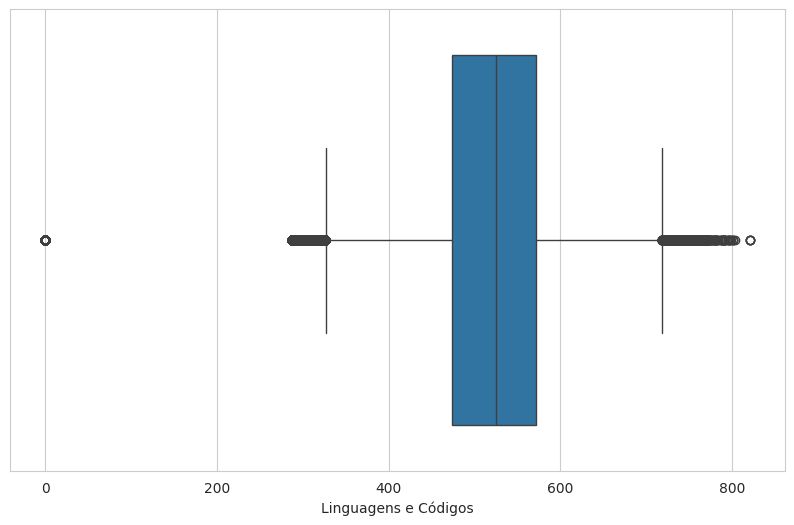

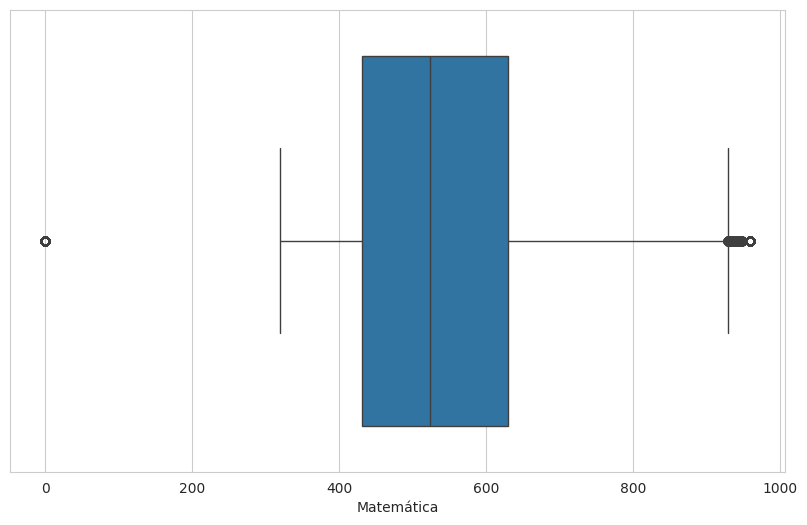

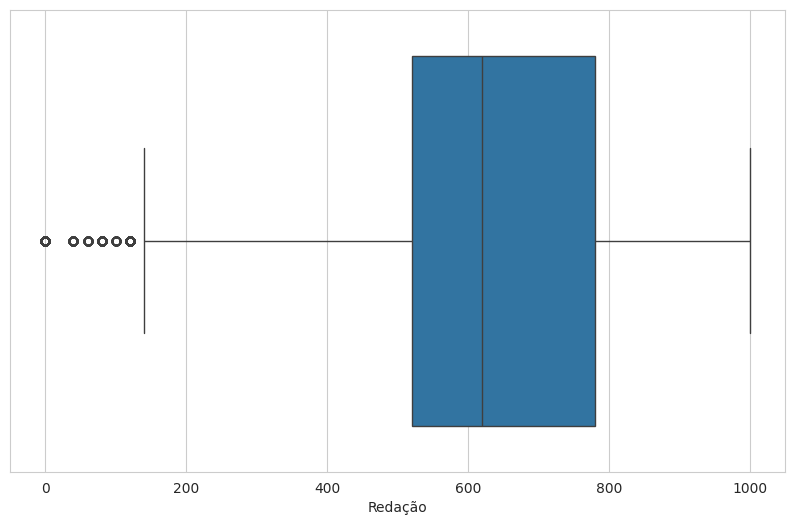

In [ ]:
for materia in colunas_alvo:
  with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=materia,data=dados_enem_pr_final)

#### **Separando Dados**

In [ ]:
preditor = dados_enem_pr_final[['Masculino', 'Feminino', 'Cor/Ra√ßa Branca', 'Cor/Ra√ßa Preta', 'Cor/Ra√ßa Parda', 'Cor/Ra√ßa Amarela', 'Cor/Ra√ßa Ind√≠gena']]
materias = dados_enem_pr_final[['Ci√™ncias da Natureza', 'Ci√™ncias Humanas', 'Linguagens e C√≥digos', 'Matem√°tica', 'Reda√ß√£o']]


#### **Padroniza√ß√£o dos dados**

In [ ]:
scaler = StandardScaler()
materias_scaled = scaler.fit_transform(materias)


In [ ]:
materias_scaled = pd.DataFrame(materias_scaled, columns=colunas_alvo)
materias_scaled = materias

In [ ]:
resultados = {}
for i in materias_scaled:
  alvo = materias_scaled[i]
  X_train, X_test, y_train, y_test = train_test_split(preditor, alvo, test_size=0.2, random_state=42)

  modelo = RandomForestRegressor(n_estimators=100, random_state=42)
  modelo.fit(X_train, y_train)

    # Fazer previs√µes
  y_pred = modelo.predict(X_test)
  print(f"Previs√µes para {i}:")
    # Avaliar o modelo
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Armazenar os resultados
  resultados[i] = {"RMSE": rmse}

    # Exibir os resultados
  print(f"RMSE: {rmse:.2f}")

# üìå Exibir o resumo final dos resultados
print("\nResumo dos resultados:")
for i, metricas in resultados.items():
    print(f"{i}: RMSE={metricas['RMSE']:.2f}")

Previs√µes para Ci√™ncias da Natureza:
[446.49493556 484.88101088 529.49945713 ... 508.45036543 529.49945713
 494.799508  ]
RMSE: 85.18
Previs√µes para Ci√™ncias Humanas:
[476.47239486 511.31861804 552.40496849 ... 544.6295814  552.40496849
 517.31542041]
RMSE: 84.62
Previs√µes para Linguagens e C√≥digos:
[475.25423745 504.89639761 540.61997934 ... 539.25876467 540.61997934
 508.7304799 ]
RMSE: 72.15
Previs√µes para Matem√°tica:
[448.91130659 514.75281938 598.97759316 ... 554.10353672 598.97759316
 535.60627768]
RMSE: 125.36
Previs√µes para Reda√ß√£o:
[534.61462778 558.19240571 637.10423545 ... 689.3776139  637.10423545
 574.93139702]
RMSE: 204.60

Resumo dos resultados:
Ci√™ncias da Natureza: RMSE=85.18
Ci√™ncias Humanas: RMSE=84.62
Linguagens e C√≥digos: RMSE=72.15
Matem√°tica: RMSE=125.36
Reda√ß√£o: RMSE=204.60


In [ ]:
print(X_test)

         Masculino  Feminino  Cor/Ra√ßa Branca  Cor/Ra√ßa Preta  Cor/Ra√ßa Parda  \
2446242          0         1                0               0               0   
1781168          1         0                0               1               0   
2113742          1         0                1               0               0   
2409544          0         1                1               0               0   
1731532          1         0                1               0               0   
...            ...       ...              ...             ...             ...   
578180           0         1                0               0               1   
1351544          0         1                1               0               0   
1576274          0         1                1               0               0   
432367           1         0                1               0               0   
1329763          1         0                0               0               1   

         Cor/Ra√ßa Amare

### **Prevendo Notas**

 Para testar coloque as caracteristicas desejadas:

In [ ]:
# Criar um DataFrame com as caracter√≠sticas desejadas
novo_aluno = pd.DataFrame({
    "Masculino": [0],
    "Feminino": [0],
    "Cor/Ra√ßa Branca": [0],
    "Cor/Ra√ßa Preta": [0],
    "Cor/Ra√ßa Parda": [0],
    "Cor/Ra√ßa Amarela": [0],
    "Cor/Ra√ßa Ind√≠gena": [0]
})

novo_aluno = novo_aluno[X_train.columns]



In [ ]:
# Fazer previs√µes para cada √°rea do conhecimento
previsao_natureza = modelo.predict(novo_aluno)
print(f"Previs√£o para Ci√™ncias da Natureza: {previsao_natureza[0]:.2f}")

previsao_humanas = modelo.predict(novo_aluno)
print(f"Previs√£o para Ci√™ncias Humanas: {previsao_humanas[0]:.2f}")

previsao_linguagens = modelo.predict(novo_aluno)
print(f"Previs√£o para Linguagens e C√≥digos: {previsao_linguagens[0]:.2f}")

previsao_matematica = modelo.predict(novo_aluno)
print(f"Previs√£o para Matem√°tica: {previsao_matematica[0]:.2f}")

previsao_redacao = modelo.predict(novo_aluno)
print(f"Previs√£o para Reda√ß√£o: {previsao_redacao[0]:.2f}")


## **Conclus√µes**

***1- Quantos alunos fizeram o enem?***

- 2678264

***2- Qual a porcentagem de alunos por cor?***
- Branca: 43,1%
- Parda: 41,7%
- Preta: 11,8%
- Amarela: 1,6%
- N√£o declarado: 1,2%
- √çndigena: 0,5%


Depois dessa longa an√°lise posso concluir algumas coisas:

- Sobre cor:
  - Os Brancos tem a maior m√©dia nas notas, sendo 150 pontos, aproximadamente, a mais da segunda maior m√©dia que √© da cor Amarela. E os Brancos tamb√©m tem uma predomin√¢ncia grande nas bancadas de prova atigindo 43,1% dos que terminaram a prova.
  - Por uma perspectiva oposta os ind√≠genas s√ßao 0,5% das pessoas que terminaram e tem a pior m√©dia de nota geral de todas as cores sendo 150 pontos, aproximadamente, a menos que a segunda pior m√©dia(Preta).

- Sobre sexo:
  - Os alunos masculinos mesmo sendo a minoria com 38,6% tem a maior m√©dia de nota. Por√©m tem uma ocila√ß√£o maior ue das mulheres fazendo com que mostre que eu precisaria analizar os outliers.

- Previs√µes:
  - Depois de criarmos o modelo de previs√£o de nota, e revisarmos sua qualidade atrav√©s do m√©todo RMSE. Concluimos que podemos prever as notas de Ci√™ncias da natureza, Ci√™ncias humanas e Linguagens e c√≥digos, para cada combina√ß√£o de sexo e cor. Pois essas mat√©rias tem um desvio padr√£o a baixo de 100 logo as previ√µes ficam mais precisas. Logo Matem√°tica e reda√ß√£o, tem um desvio padr√£o maior que 100, fazendo que o modelo de previs√£o tenha muita dificuldade de prever a nota.
